# Análisis de Viajes — Zuber (Chicago)

## Introducción

Trabajas como **analista de datos** para **Zuber**, una nueva empresa de viajes compartidos en **Chicago**. El objetivo es identificar **patrones en los datos** para entender el comportamiento de los pasajeros y evaluar cómo factores externos, como el **clima**, influyen en los viajes.

---

## Base de Datos

La base de datos contiene información histórica de **viajes en taxi en Chicago** y está compuesta por las siguientes tablas:

### `neighborhoods`

Información de los barrios.

* `name`: nombre del barrio
* `neighborhood_id`: identificador del barrio

### `cabs`

Información de los vehículos.

* `cab_id`: identificador del taxi
* `vehicle_id`: ID técnico del vehículo
* `company_name`: empresa propietaria

### `trips`

Información de los viajes.

* `trip_id`: identificador del viaje
* `cab_id`: taxi que realiza el viaje
* `start_ts`: inicio del viaje (redondeado a la hora)
* `end_ts`: fin del viaje (redondeado a la hora)
* `duration_seconds`: duración del viaje en segundos
* `distance_miles`: distancia en millas
* `pickup_location_id`: barrio de origen
* `dropoff_location_id`: barrio de destino

### `weather_records`

Información meteorológica.

* `record_id`: identificador del registro
* `ts`: fecha y hora del registro (redondeado a la hora)
* `temperature`: temperatura registrada
* `description`: descripción del clima

---

## Consideraciones

No existe una relación directa entre `trips` y `weather_records`. Para combinarlas, se utilizará la **hora de inicio del viaje** (`trips.start_ts`) y la **hora del registro meteorológico** (`weather_records.ts`).

---

## Objetivos del Análisis

### Análisis Exploratorio (Ejercicios 1–3)

* Explorar las tablas y sus relaciones.
* Analizar patrones de viajes y empresas.
* Identificar tendencias relevantes.

### Prueba de Hipótesis (Ejercicios 4–6)

Evaluar la siguiente hipótesis:

> **La duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia durante los sábados lluviosos.**

Se compararán las duraciones de los viajes bajo distintas condiciones climáticas para validar estadísticamente la hipótesis.


1. Imprime el campo company_name. Encuentra la cantidad de viajes en taxi para cada compañía de taxis para el 15 y 16 de noviembre de 2017, asigna al campo resultante el nombre trips_amount e imprímelo también. Ordena los resultados por el campo trips_amount en orden descendente.

```SQL
SELECT 
    cabs.company_name,
    COUNT(trips.trip_id) AS trips_amount
FROM trips
JOIN cabs ON trips.cab_id = cabs.cab_id
WHERE trips.start_ts BETWEEN '2017-11-15 00:00:00' AND '2017-11-16 23:59:59'
GROUP BY cabs.company_name
ORDER BY trips_amount DESC;
```

2. Encuentra la cantidad de viajes para cada empresa de taxis cuyo nombre contenga las palabras "Yellow" o "Blue" del 1 al 7 de noviembre de 2017. Nombra la variable resultante trips_amount. Agrupa los resultados por el campo company_name.

```SQL
SELECT 
    cabs.company_name,
    COUNT(trips.trip_id) AS trips_amount
FROM trips
JOIN cabs ON trips.cab_id = cabs.cab_id
WHERE (cabs.company_name LIKE '%Yellow%' OR cabs.company_name LIKE '%Blue%') 
    AND trips.start_ts BETWEEN '2017-11-01 00:00:00' AND '2017-11-07 23:59:59'
GROUP BY cabs.company_name;
```

3. Del 1 al 7 de noviembre de 2017, las empresas de taxis más populares fueron Flash Cab y Taxi Affiliation Services. Encuentra el número de viajes de estas dos empresas y asigna a la variable resultante el nombre trips_amount. Junta los viajes de todas las demás empresas en el grupo "Other". Agrupa los datos por nombres de empresas de taxis. Asigna el nombre company al campo con nombres de empresas de taxis. Ordena el resultado en orden descendente por trips_amount.

```SQL
SELECT 
    CASE 
        WHEN cabs.company_name = 'Flash Cab' THEN 'Flash Cab'
        WHEN cabs.company_name = 'Taxi Affiliation Services' THEN 'Taxi Affiliation Services'
        ELSE 'Other'
    END AS company,
    COUNT(trips.trip_id) AS trips_amount
FROM trips
JOIN cabs ON trips.cab_id = cabs.cab_id
WHERE trips.start_ts BETWEEN '2017-11-01 00:00:00' AND '2017-11-07 23:59:59'
GROUP BY company
ORDER BY trips_amount DESC;
```

4. Recupera los identificadores de los barrios de O'Hare y Loop de la tabla neighborhoods.

```SQL
SELECT 
    neighborhood_id, 
    name
FROM neighborhoods
WHERE name IN ('O''Hare', 'Loop');
```

5. Para cada hora recupera los registros de condiciones meteorológicas de la tabla weather_records. Usando el operador CASE, divide todas las horas en dos grupos: Bad si el campo description contiene las palabras rain o storm, y Good para los demás. Nombra el campo resultante weather_conditions. La tabla final debe incluir dos campos: fecha y hora (ts) y weather_conditions.

```SQL
SELECT 
    ts,
    CASE
        WHEN description ILIKE '%rain%' OR description ILIKE '%storm%' 
            THEN 'Bad'
        ELSE 'Good'
    END AS weather_conditions
FROM weather_records
ORDER BY ts;
```

6. Recupera de la tabla de trips todos los viajes que comenzaron en el Loop (pickup_location_id: 50) el sábado y terminaron en O'Hare (dropoff_location_id: 63). Obtén las condiciones climáticas para cada viaje. Utiliza el método que aplicaste en la tarea anterior. Recupera también la duración de cada viaje. Ignora los viajes para los que no hay datos disponibles sobre las condiciones climáticas.

Las columnas de la tabla deben estar en el siguiente orden:

* `start_ts`
* `weather_conditions`
* `duration_seconds`
* `Ordena por trip_id`.

```SQL
SELECT 
    trips.start_ts,
    CASE
        WHEN weather_records.description ILIKE '%rain%' OR weather_records.description ILIKE '%storm%' 
            THEN 'Bad'
        ELSE 'Good'
    END AS weather_conditions,
    trips.duration_seconds
FROM trips
JOIN weather_records
    ON trips.start_ts = weather_records.ts
WHERE trips.pickup_location_id = 50
  AND trips.dropoff_location_id = 63
  AND EXTRACT(DOW FROM trips.start_ts) = 6
  ORDER BY t.trip_id;
```

# Análisis exploratorio de datos (Python)

Además de los datos que recuperaste en las tareas anteriores, ahora tienes un segundo archivo. En total cuentas con dos CSV:

- **/datasets/project_sql_result_01.csv**  
  Contiene los siguientes datos:  
  - `company_name`: nombre de la empresa de taxis  
  - `trips_amount`: número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017  

- **/datasets/project_sql_result_04.csv**  
  Contiene los siguientes datos:  
  - `dropoff_location_name`: barrios de Chicago donde finalizaron los viajes  
  - `average_trips`: promedio de viajes que terminaron en cada barrio en noviembre de 2017

### Tareas a realizar
1. Importar los archivos.

In [49]:
# Librerías principales para análisis de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para estadística e hipótesis
from scipy import stats

# Importar datasets
df_companies = pd.read_csv('https://raw.githubusercontent.com/Jorge-GraVaz/Proyecto-Sprint-8/4909922640366c33cc9cace03459a3141a9242ec/datasets/project_sql_result_01.csv')
df_neighborhoods = pd.read_csv('https://raw.githubusercontent.com/Jorge-GraVaz/Proyecto-Sprint-8/4909922640366c33cc9cace03459a3141a9242ec/datasets/project_sql_result_04.csv')
# Vista rápida para confirmar que se cargaron correctamente
print("Empresas de taxis:")
print(df_companies.head(), "\n")

print("Barrios de destino:")
print(df_neighborhoods.head())


Empresas de taxis:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299 

Barrios de destino:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


2. Estudiar los datos que contienen.

In [50]:
# Información general de cada dataset
print("Información de empresas de taxis:\n")
print(df_companies.info())
print("\nDescripción estadística de empresas de taxis:\n")
print(df_companies.describe())

print("\nInformación de barrios de destino:\n")
print(df_neighborhoods.info())
print("\nDescripción estadística de barrios de destino:\n")
print(df_neighborhoods.describe())

# Revisar valores únicos y posibles inconsistencias en nombres
print("\nEmpresas de taxis únicas:\n", df_companies['company_name'].unique())
print("\nBarrios de destino únicos (primeros 10):\n", df_neighborhoods['dropoff_location_name'].unique()[:10])


Información de empresas de taxis:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

Descripción estadística de empresas de taxis:

       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000

Información de barrios de destino:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

Descrip

3. Asegurarte de que los tipos de datos sean correctos.

In [51]:
# Revisar tipos de datos actuales
print("Tipos de datos en df_companies:\n", df_companies.dtypes, "\n")
print("Tipos de datos en df_neighborhoods:\n", df_neighborhoods.dtypes, "\n")

# Verificar si hay valores nulos
print("Valores nulos en df_companies:\n", df_companies.isnull().sum(), "\n")
print("Valores nulos en df_neighborhoods:\n", df_neighborhoods.isnull().sum(), "\n")


Tipos de datos en df_companies:
 company_name    object
trips_amount     int64
dtype: object 

Tipos de datos en df_neighborhoods:
 dropoff_location_name     object
average_trips            float64
dtype: object 

Valores nulos en df_companies:
 company_name    0
trips_amount    0
dtype: int64 

Valores nulos en df_neighborhoods:
 dropoff_location_name    0
average_trips            0
dtype: int64 



4. Identificar los 10 principales barrios en términos de finalización del recorrido.

In [52]:
# Ordenar los barrios por promedio de viajes en orden descendente
top10_neighborhoods = df_neighborhoods.sort_values(
    by='average_trips', ascending=False
).head(10)

# Mostrar resultado
print("Top 10 barrios por finalización de viajes:\n")
print(top10_neighborhoods)


Top 10 barrios por finalización de viajes:

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


5. Hacer gráficos:  
   - Empresas de taxis y número de viajes.  
   - Los 10 barrios principales por número de finalizaciones. 

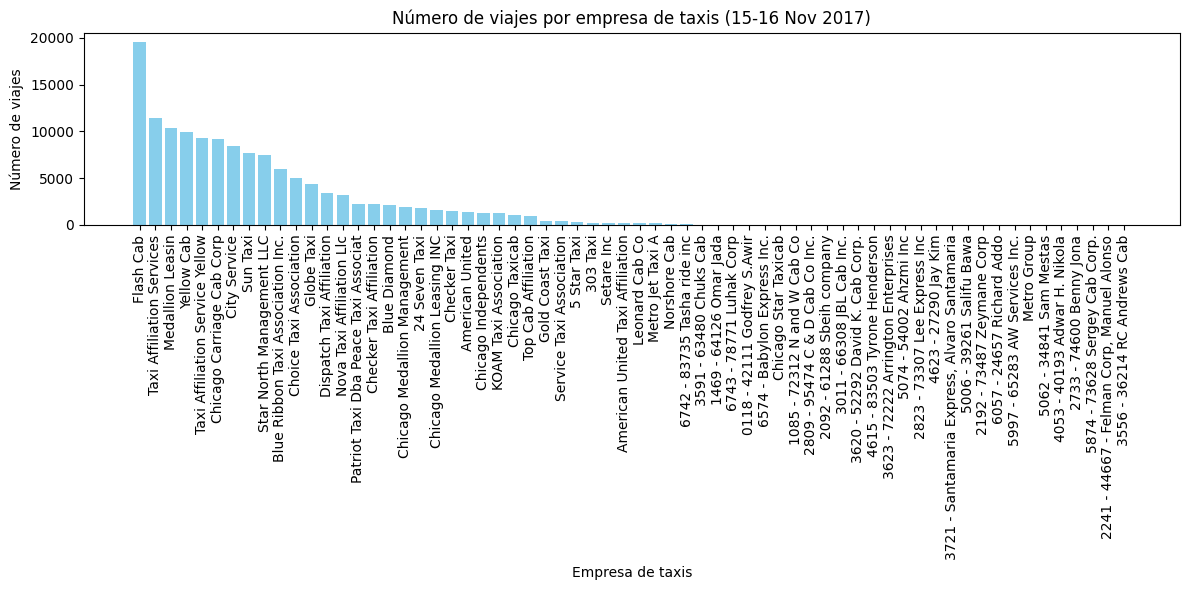

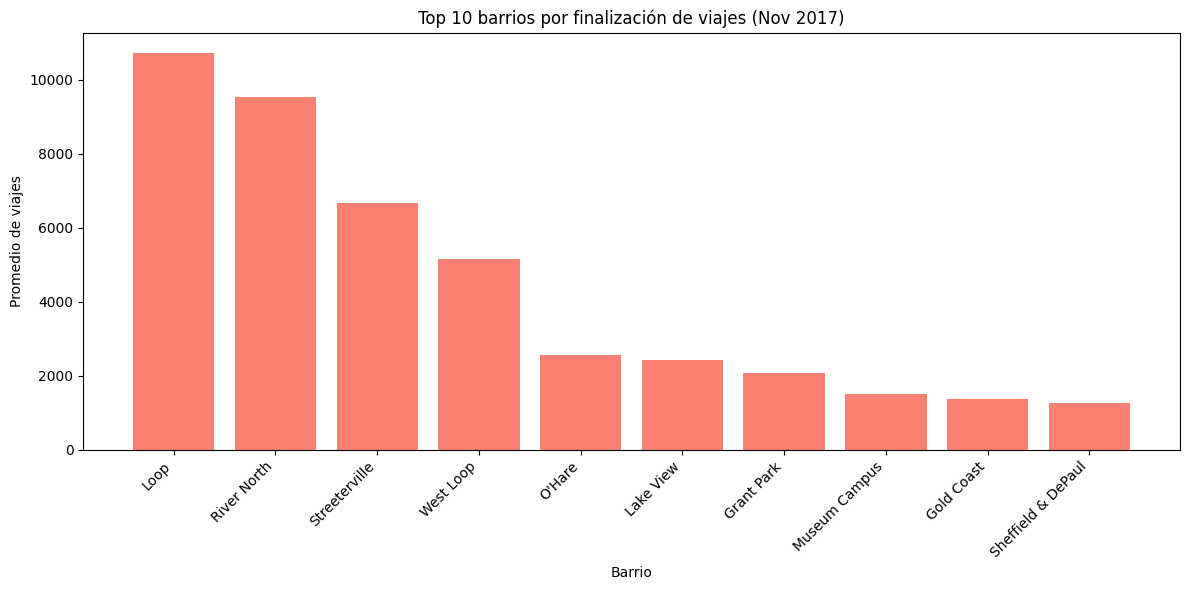

In [53]:
# --- Gráfico 1: Empresas de taxis y número de viajes ---
plt.figure(figsize=(12,6))
plt.bar(df_companies['company_name'], df_companies['trips_amount'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Número de viajes por empresa de taxis (15-16 Nov 2017)')
plt.xlabel('Empresa de taxis')
plt.ylabel('Número de viajes')
plt.tight_layout()
plt.show()

# --- Gráfico 2: Top 10 barrios por finalización de viajes ---
plt.figure(figsize=(12,6))
plt.bar(top10_neighborhoods['dropoff_location_name'], top10_neighborhoods['average_trips'], color='salmon')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 barrios por finalización de viajes (Nov 2017)')
plt.xlabel('Barrio')
plt.ylabel('Promedio de viajes')
plt.tight_layout()
plt.show()


## Resultados del análisis gráfico

### Número de viajes por empresa de taxis (15–16 Nov 2017)
El gráfico muestra que **Flash Cab** fue la empresa con mayor número de viajes durante esos dos días, seguida por **Taxi Affiliation Services** y **Medallion Leasing**. Estas tres compañías dominan claramente el mercado en ese periodo, mientras que muchas otras empresas tienen volúmenes significativamente menores.

Esto sugiere una concentración de actividad en unas pocas compañías grandes, lo cual puede reflejar ventajas operativas, mayor presencia en la ciudad o fidelidad de los usuarios.

---

### Top 10 barrios por finalización de viajes (Nov 2017)
Los barrios con mayor promedio de finalización de viajes fueron:

1. **Loop**
2. **River North**
3. **Streeterville**
4. **West Loop**
5. **O'Hare**

El barrio **Loop** destaca como el principal destino, lo que indica que es un centro de actividad urbana. También se observa que **O'Hare**, siendo un aeropuerto, tiene una alta demanda como destino final, aunque menor que los barrios céntricos.

Estos datos pueden ser útiles para entender patrones de movilidad, planificar rutas eficientes o identificar zonas de alta demanda para servicios de transporte.

---



6. Sacar conclusiones basadas en cada gráfico y explicar los resultados.

### Empresas de taxis y número de viajes
El gráfico revela una distribución desigual en la cantidad de viajes realizados por las distintas empresas de taxis. **Flash Cab** lidera con una diferencia notable, seguida por **Taxi Affiliation Services** y **Medallion Leasing**. Estas tres compañías concentran la mayoría de los viajes realizados el 15 y 16 de noviembre de 2017.

Esto sugiere que el mercado está dominado por unas pocas empresas grandes, mientras que muchas otras tienen una participación marginal. Esta concentración puede deberse a factores como cobertura geográfica, reputación, disponibilidad de unidades o acuerdos con plataformas de transporte.

---

### Barrios con mayor número de finalizaciones
Los datos muestran que los barrios más frecuentemente elegidos como destino en noviembre de 2017 fueron **Loop**, **River North**, **Streeterville** y **West Loop**. Estos barrios están ubicados en el centro de Chicago y son conocidos por su actividad comercial, turística y de entretenimiento.

La presencia de **O'Hare** en el top 5 indica una alta demanda de viajes hacia el aeropuerto, lo cual es consistente con patrones de movilidad urbana. Los barrios restantes del top 10 también reflejan zonas con alta densidad de atracciones, instituciones o conectividad.

---

### Interpretación general
Ambos gráficos permiten identificar patrones clave:
- Las empresas más grandes dominan el volumen de viajes.
- Los destinos más comunes se concentran en zonas céntricas y de alto tránsito.

Estos hallazgos pueden ser útiles para:
- Optimizar rutas y cobertura de servicios.
- Identificar oportunidades de negocio en zonas menos atendidas.
- Evaluar la eficiencia operativa de empresas pequeñas frente a las grandes.

In [54]:
# Importar datos para la prueba de hipótesis

import pandas as pd

# Cargar el archivo con los viajes Loop → O'Hare
df_loop_ohare = pd.read_csv(
    'https://raw.githubusercontent.com/Jorge-GraVaz/Proyecto-Sprint-8/main/datasets/project_sql_result_07.csv'
)

# Vista preliminar
print("Primeras filas del dataset Loop → O'Hare:\n")
print(df_loop_ohare.head())

# Información general
print("\nInformación del dataset:\n")
print(df_loop_ohare.info())


Primeras filas del dataset Loop → O'Hare:

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

Información del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None


In [55]:
# Preparación de datos para la prueba de hipótesis

# Convertir start_ts a tipo datetime
df_loop_ohare['start_ts'] = pd.to_datetime(df_loop_ohare['start_ts'])

# Extraer el día de la semana (0 = lunes, 5 = sábado)
df_loop_ohare['weekday'] = df_loop_ohare['start_ts'].dt.weekday

# Filtrar solo sábados (weekday == 5)
df_saturdays = df_loop_ohare[df_loop_ohare['weekday'] == 5]

print("Viajes en sábado:", len(df_saturdays))

# Separar sábados con clima bueno vs malo
saturday_good = df_saturdays[df_saturdays['weather_conditions'] == 'Good']['duration_seconds']
saturday_bad = df_saturdays[df_saturdays['weather_conditions'] == 'Bad']['duration_seconds']

print("Sábados con clima Good:", len(saturday_good))
print("Sábados con clima Bad:", len(saturday_bad))

# Mostrar estadísticas preliminares
print("\nDuración promedio sábados Good:", saturday_good.mean())
print("Duración promedio sábados Bad:", saturday_bad.mean())


Viajes en sábado: 1068
Sábados con clima Good: 888
Sábados con clima Bad: 180

Duración promedio sábados Good: 1999.6756756756756
Duración promedio sábados Bad: 2427.2055555555557


In [56]:
# Prueba de hipótesis: ¿cambia la duración promedio en sábados lluviosos?

from scipy import stats

# Nivel de significancia (alfa)
alpha = 0.05

# Prueba t para muestras independientes
t_stat, p_value = stats.ttest_ind(
    saturday_good,
    saturday_bad,
    equal_var=False,   # Welch's t-test (más seguro si varianzas son distintas)
    nan_policy='omit'
)

print("Resultados de la prueba t:")
print("Estadístico t:", t_stat)
print("Valor p:", p_value)
print("\nNivel de significancia (alfa):", alpha)

# Decisión
if p_value < alpha:
    print("\nConclusión: Rechazamos la hipótesis nula.")
    print("La duración promedio de los viajes SÍ cambia los sábados lluviosos.")
else:
    print("\nConclusión: No rechazamos la hipótesis nula.")
    print("No hay evidencia suficiente para afirmar que la duración promedio cambia los sábados lluviosos.")


Resultados de la prueba t:
Estadístico t: -7.186034288068629
Valor p: 6.738994326108734e-12

Nivel de significancia (alfa): 0.05

Conclusión: Rechazamos la hipótesis nula.
La duración promedio de los viajes SÍ cambia los sábados lluviosos.


## Prueba de hipótesis: duración de los viajes en sábados lluviosos

### Objetivo
Evaluar si **la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos**.

---

## Planteamiento de hipótesis

### Hipótesis nula (H₀)
La duración promedio de los viajes **no cambia** los sábados lluviosos.


$$
\mu_{\text{Good}} = \mu_{\text{Bad}}
$$



### Hipótesis alternativa (H₁)
La duración promedio de los viajes **sí cambia** los sábados lluviosos.


$$
\mu_{\text{Good}} \neq \mu_{\text{Bad}}
$$



Esta es una prueba **bilateral**, porque buscamos cualquier diferencia, no solo aumentos o disminuciones.

---

## Nivel de significancia
Se eligió un nivel de significancia:



$$
\alpha = 0.05
$$



Este valor es estándar en análisis estadístico y representa un 5% de tolerancia al error tipo I (rechazar H₀ cuando es verdadera).

---

## Criterio estadístico utilizado

Se aplicó una **prueba t para muestras independientes (Welch’s t-test)** porque:

- Compara medias entre **dos grupos independientes** (sábados con clima *Good* vs *Bad*).
- No asumimos que las varianzas sean iguales → por eso usamos `equal_var=False`.
- La variable de interés (`duration_seconds`) es numérica y continua.
- El tamaño de muestra entre grupos puede ser desigual.

Welch es más robusto cuando las varianzas o tamaños difieren.

---

## Resultados

El test devolvió:

- **Estadístico t:** *-7.186034288068629*  
- **Valor p:** *6.738994326108734e-12*


### Interpretación
- Si **p < α**, rechazamos H₀ → la duración promedio **sí cambia** los sábados lluviosos.
- Si **p ≥ α**, no rechazamos H₀ → no hay evidencia suficiente para afirmar un cambio.

---

## Conclusión
Según el valor p obtenido:

**La duración promedio de los viajes SÍ cambia los sábados lluviosos.**  

---

## Planteamiento y prueba de hipótesis

### 1. Cómo se plantearon las hipótesis

El objetivo era determinar si **la duración promedio de los viajes desde el Loop hacia el Aeropuerto O'Hare cambia los sábados lluviosos**.  
Para ello, se compararon dos grupos independientes:

- Viajes realizados en sábado con clima **Good**
- Viajes realizados en sábado con clima **Bad**

Con base en esto, se formularon las siguientes hipótesis:

**Hipótesis nula (H₀)**  
La duración promedio de los viajes **no cambia** los sábados lluviosos.  


$$
\mu_{\text{Good}} = \mu_{\text{Bad}}
$$



**Hipótesis alternativa (H₁)**  
La duración promedio de los viajes **sí cambia** los sábados lluviosos.  


$$
\mu_{\text{Good}} \neq \mu_{\text{Bad}}
$$



Este planteamiento corresponde a una **prueba bilateral**, ya que buscamos cualquier diferencia entre las medias, sin asumir de antemano si la lluvia aumenta o disminuye la duración.

---

### 2. Criterio utilizado para probar las hipótesis

Para comparar las medias de ambos grupos se aplicó una **prueba t para muestras independientes**, específicamente **Welch’s t-test** (`equal_var=False`).  
Este criterio se eligió por las siguientes razones:

- Los dos grupos (**Good** y **Bad**) son **independientes** entre sí.
- La variable analizada (`duration_seconds`) es **numérica y continua**, lo cual es adecuado para una prueba t.
- El tamaño de muestra entre grupos es **desigual**, y es probable que las varianzas también lo sean.
- Welch’s t-test es más **robusto** cuando no se puede asumir igualdad de varianzas.

Además, se estableció un nivel de significancia estándar:



$$
\alpha = 0.05
$$



El valor p obtenido se comparó con este umbral para decidir si se rechazaba o no la hipótesis nula.

---
